In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import mean_squared_error
from MergeDelayAndWeatherData import get_data_for_learning

In [2]:
#load the data
delay_columns = ['PERCENT_DELAYED_DEP','AVG_DEP_DELAY',
                                   'NUM_SCHEDULED_DEP','NUM_SCEDULED_ARR',
                                   'PERCENT_DELAYED_ARR','AVG_ARR_DELAY']
weather_columns = ["PRECIP_PROBABILITY","TEMPERATURE","WIND_SPEED", "WIND_GUST", 'SUMMARY', 'VISIBILITY']
all_columns = delay_columns + weather_columns
data = get_data_for_learning(delay_columns,weather_columns)
data["DATETIME"] = data.index

In [3]:
#creating the train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

Text(0.5, 0, 'PERCENT_DELAYED_DEP/HOUR')

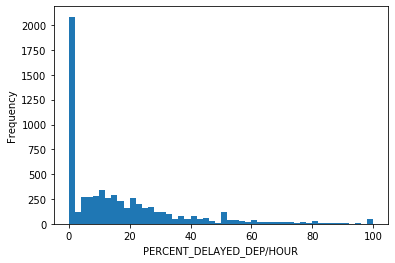

In [4]:
#scatter_matrix(train, figsize=(12,8))
ax = train['PERCENT_DELAYED_DEP'].plot.hist(bins=50)
plt.xlabel("PERCENT_DELAYED_DEP/HOUR")

Text(0.5, 0, 'AVG_DEP_DELAY/HOUR')

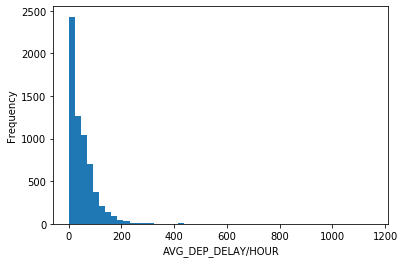

In [5]:
ax1 = train['AVG_DEP_DELAY'].plot.hist(bins=50)
plt.xlabel("AVG_DEP_DELAY/HOUR")

In [6]:
df_by_month_mean = data.groupby(data["DATETIME"].dt.month).mean()
df_by_hour_mean = data.groupby(data["DATETIME"].dt.hour).mean()
df_by_weekday_mean = data.groupby(data["DATETIME"].dt.weekday_name).mean()
new_index = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_by_month_mean.sort_index(inplace=True)
df_by_hour_mean.sort_index(inplace=True)
df_by_weekday_mean = df_by_weekday_mean.reindex(new_index)

df_by_month_std = data.groupby(data["DATETIME"].dt.month).std()/np.sqrt(30)
df_by_hour_std = data.groupby(data["DATETIME"].dt.hour).std()/np.sqrt(334)
df_by_weekday_std = data.groupby(data["DATETIME"].dt.weekday_name).std()/np.sqrt(1145)
df_by_month_std.sort_index(inplace=True)
df_by_hour_std.sort_index(inplace=True)
df_by_weekday_std = df_by_weekday_std.reindex(new_index)

Text(0, 0.5, 'AVG_DEP_DELAY/HOUR')

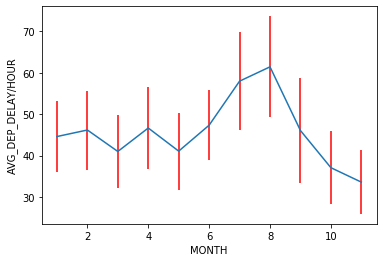

In [7]:
plt.figure()
plt.errorbar(df_by_month_mean.index, df_by_month_mean["AVG_DEP_DELAY"],df_by_month_std["AVG_DEP_DELAY"], ecolor="red")
plt.xlabel("MONTH")
plt.ylabel("AVG_DEP_DELAY/HOUR")

Text(0, 0.5, 'AVG_DEP_DELAY/HOUR')

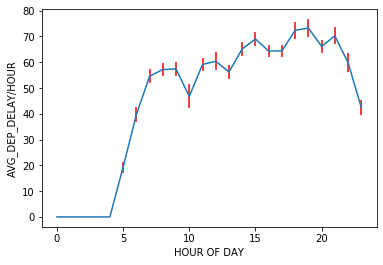

In [8]:
plt.figure()
plt.errorbar(df_by_hour_mean.index, df_by_hour_mean["AVG_DEP_DELAY"],df_by_hour_std["AVG_DEP_DELAY"], ecolor="red")
plt.xlabel("HOUR OF DAY")
plt.ylabel("AVG_DEP_DELAY/HOUR")

Text(0, 0.5, 'AVG_DEP_DELAY/HOUR')

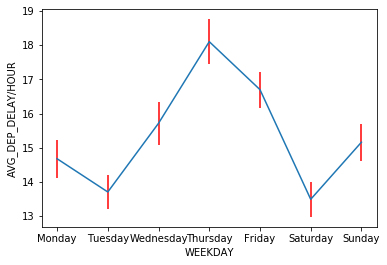

In [9]:
plt.figure()
plt.errorbar(df_by_weekday_mean.index, df_by_weekday_mean["PERCENT_DELAYED_DEP"],df_by_weekday_std["PERCENT_DELAYED_DEP"], ecolor="red")
plt.xlabel("WEEKDAY")
plt.ylabel("AVG_DEP_DELAY/HOUR")

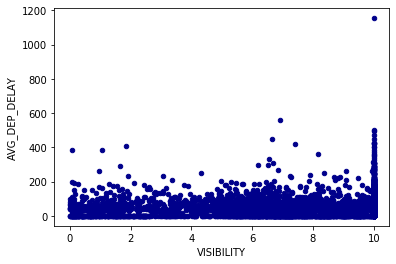

In [11]:
ax2 = train.plot.scatter(x='VISIBILITY', y='AVG_DEP_DELAY', c='DarkBlue')


Text(0, 0.5, 'AVG_DEP_DELAY/HOUR')

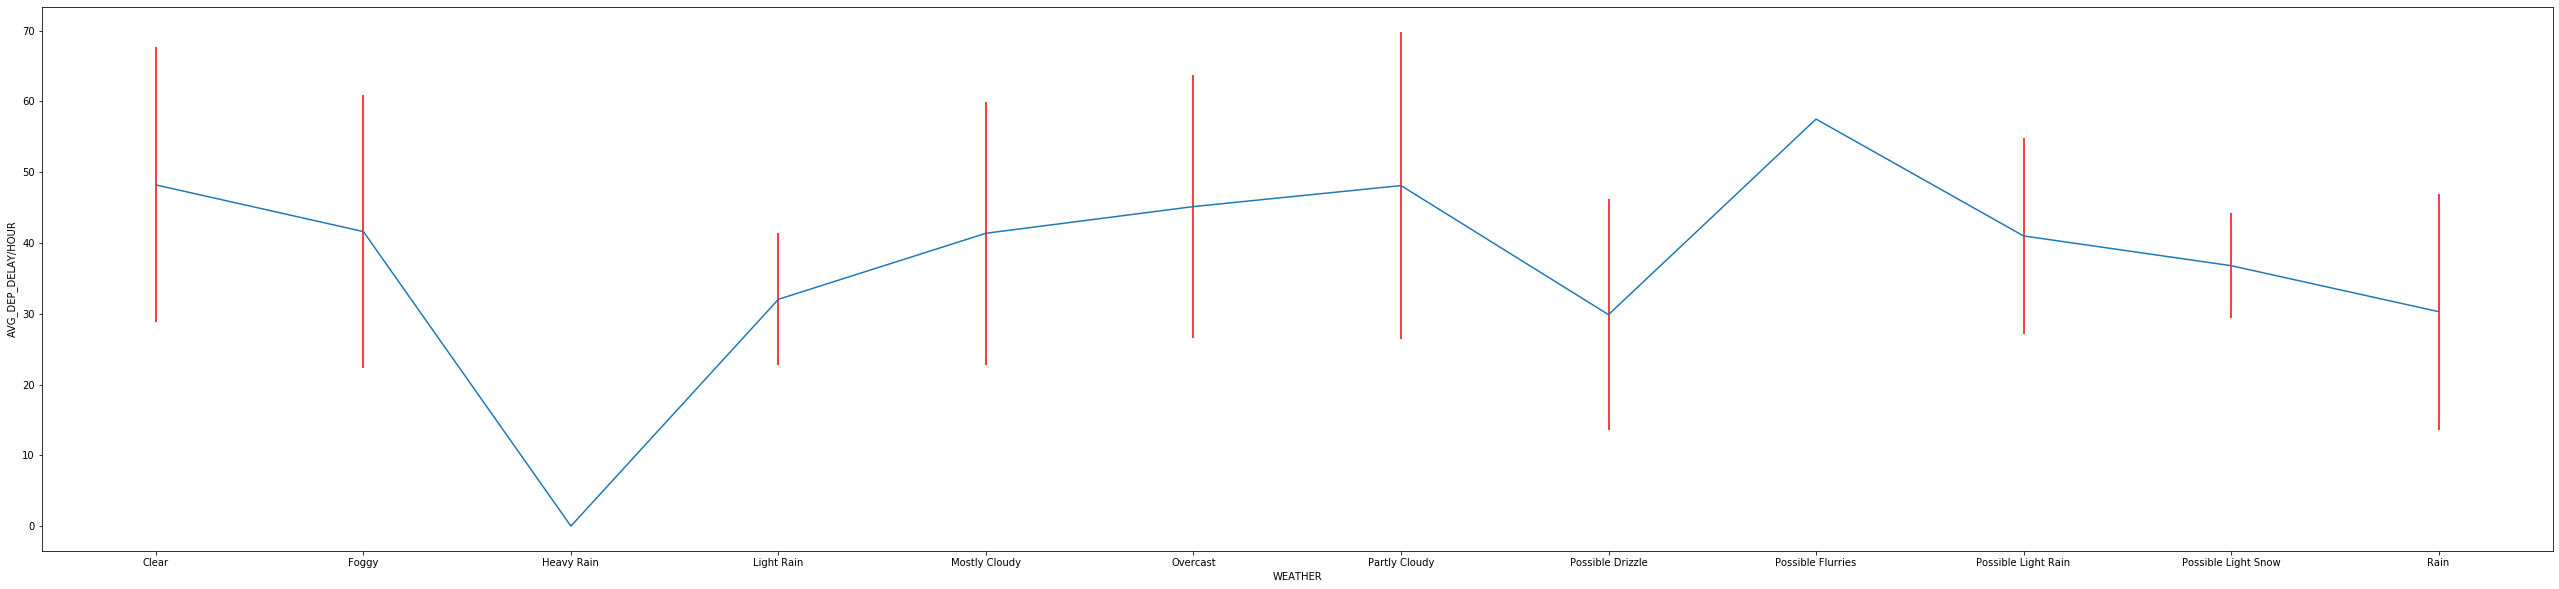

In [12]:
df_by_wea_summ_mean = data.groupby(data["SUMMARY"]).mean()
df_by_wea_summ_std = data.groupby(data["SUMMARY"]).std()

plt.figure(figsize=(45,10))
plt.errorbar(df_by_wea_summ_mean.index, df_by_wea_summ_mean["AVG_DEP_DELAY"],df_by_wea_summ_std["PERCENT_DELAYED_DEP"], ecolor="red")
plt.xlabel("WEATHER")
plt.ylabel("AVG_DEP_DELAY/HOUR")